# Importing Necessary Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Data

In [37]:
path = 'Data\Question3.csv'
df = pd.read_csv(filepath_or_buffer=path, header=None, names=['feature 1', 'feature 2', 'label'])

<>:1: SyntaxWarning: invalid escape sequence '\Q'
<>:1: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\USER\AppData\Local\Temp\ipykernel_19644\3106428001.py:1: SyntaxWarning: invalid escape sequence '\Q'
  path = 'Data\Question3.csv'


In [38]:
df.head()

,feature 1,feature 2,label
0,0.459694,-0.470583,0.0
1,0.797385,-0.343030,0.0
2,0.235270,0.961296,0.0
3,0.765453,-0.177644,0.0
4,-0.335577,-0.313893,0.0


In [39]:
df.isna().sum()

feature 1    0
feature 2    0
label        0
dtype: int64

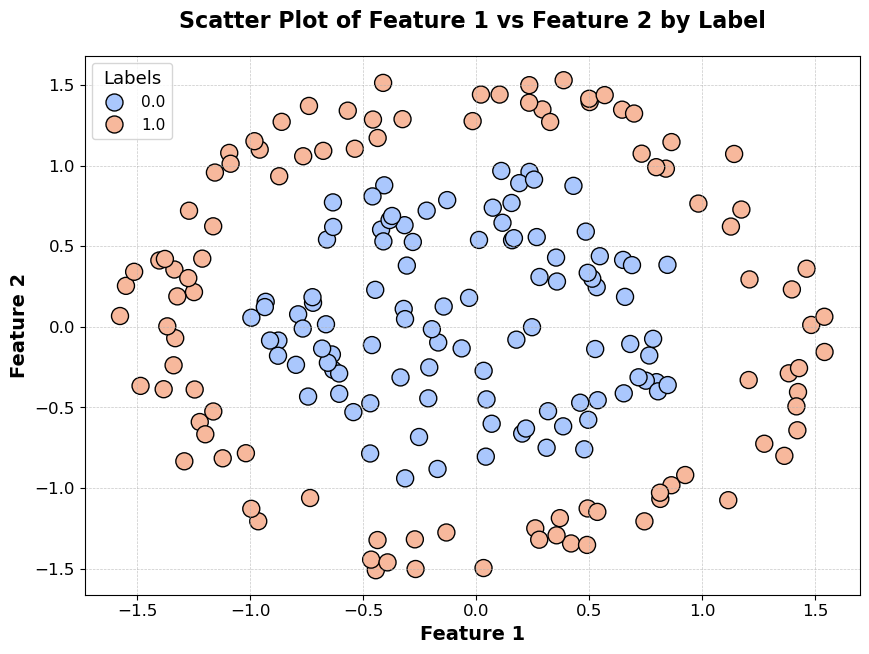

In [40]:
plt.figure(figsize=(10, 7))
scatter_plot = sns.scatterplot(data=df, x='feature 1', y='feature 2', hue='label', 
                               palette='coolwarm', s=150, edgecolor="black", marker='o')

plt.title("Scatter Plot of Feature 1 vs Feature 2 by Label", fontsize=16, weight='bold', pad=20)
plt.xlabel("Feature 1", fontsize=14, weight='bold')
plt.ylabel("Feature 2", fontsize=14, weight='bold')
plt.legend(title='Labels', title_fontsize='13', fontsize='11', loc='upper left', frameon=True)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [41]:
np.random.seed(42)

In [42]:
class Madline(object):
    def __init__(self, n_neurons:int) -> None:
        """
        Creating an object of model with given number of neurons and initializing the weights and biases to small random numbers.
        Parameters: 
            n_neurons: Specifying the number of neurons in hidden layer
        """
        self.w_1 = np.random.rand(2, n_neurons)
        self.b_1 = np.random.rand(n_neurons)
        self.w_2 = np.array([1]*n_neurons)
        self.b_2 = np.array([n_neurons - 1])
        print(f'Shape of weights between input and hidden layer is: {self.w_1.shape}')
        print(f'Shape of bias for first layer: {self.b_1.shape}')
        print(f'Shape of weights between hidden and output layer is: {self.w_2.shape}')
        print(f'Shape of bias for output layer: {self.b_2.shape}')

    def _activation_function(self, net:np.array) -> int:
        """
        Compute activation function for a given input.
        Parameter:
            net: Input of layer.
        Return:
            Activated output of layer.
        """
        return np.where(net >= 0, 1, -1)

    def update_weigths(self, label:np.array, lr:float, sample:np.array, net:np.array) -> None:
        """
        Updating weigths with given parameters:
        Parameter:
            -lr: learning rate (small number)
            -sample: given sample
            -label: target of sample
            -z: activation of first layer
            -y: activation of output layer
        """
        if label == 1:
            max_net = np.max(net)
            indices = np.where(net == max_net)[0]
            for ind in indices:
                self.b_1[ind] += lr * (1-net[ind])
                self.w_1[:, ind] += lr * (1-net[ind]) * sample
        else:
            positive_indices = np.where(net > 0)[0]
            for idx in positive_indices:
                self.b_1[idx] += lr * (-1 - net[idx])
                self.w_1[:, idx] += lr * (-1 - net[idx]) * sample

    def forward(self, sample:np.array) -> tuple:
        """
        Moving forward to network with given sample.
        Parameter:
            sample: Given a sample.
        Return:
            A tuple containing output for each layer.
        """
        net = np.dot(self.w_1.T, sample) + self.b_1
        z = self._activation_function(net)
        y = self._activation_function(np.dot(self.w_2.T, z) + self.b_2)
        return net, y

    def train(self, lr:float, epochs:int, X:np.array, labels:np.array) -> None:
        """
        Train the Madline net.
        Parameters:
            lr: learning rate.
            epochs: max number of epoch for training.
            X: numpy array for train set.
            labels: target of each sample for train set.
        """
        for epoch in tqdm(range(epochs)):
            error = 0
            weigths = np.copy(self.w_1)
            for i, sample in enumerate(X):
                net, y = self.forward(sample=sample)
                if y == labels[i]:
                    continue
                self.update_weigths(label=labels[i], lr=lr, sample=sample, net=net)
                error += 1
            if error == 0 or (np.all(self.w_1 - weigths) < 1e-5 and epoch > 20):
                print(f'Number of epochs: {epoch + 1}')
                break
    
    def test(self, X_test:np.array) -> np.array:
        """
        Given test set inputs', the model will predict all samples.
        Parameters:
            X_test: a numpy array contains samples for inputs of test set
        Return:
            preds: output of model for each sample.
        """
        preds = []
        for i,sample in enumerate(X_test):
            _, pred = self.forward(sample=sample)
            preds.append(pred.item())
        return preds
    
    def get_lines(self) -> tuple:
        """
        Calculate the slopes and intercepts of hidden nurons
        Return:
            Slopes: slope of each neuron
            Intercepts: intercept of each neuron
        """
        slopes = -1*(self.w_1[0] / self.w_1[1])
        inteceps = -1*(self.b_1 / self.w_1[1])
        return slopes, inteceps

In [43]:
model = Madline(n_neurons=2)

Shape of weights between input and hidden layer is: (2, 2)
Shape of bias for first layer: (2,)
Shape of weights between hidden and output layer is: (2,)
Shape of bias for output layer: (1,)


In [44]:
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
labels = np.array([-1, 1, 1, -1])

In [45]:
model.train(lr=1e-3, epochs=1000, X=X, labels=labels)

  0%|          | 0/1000 [00:00<?, ?it/s]

Number of epochs: 273


In [46]:
slopes, offsets = model.get_lines()

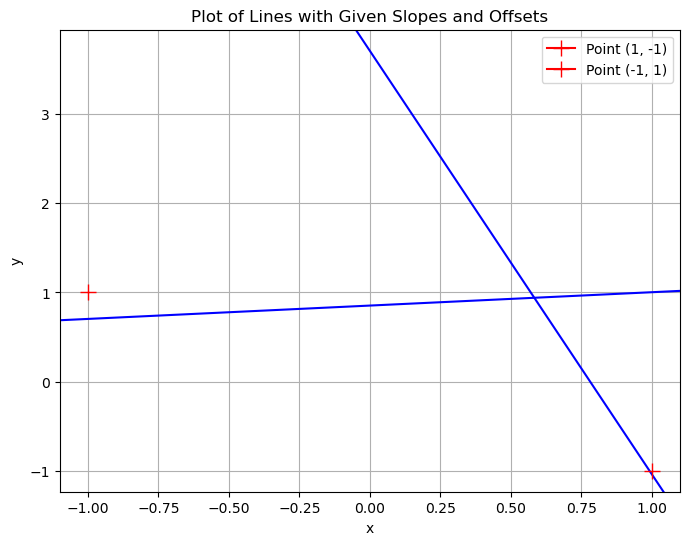

In [47]:
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(8, 6))
for i in range(slopes.shape[0]):
    plt.axline((0, float(offsets[i])), slope=slopes[i], color='b')
points = [[1, -1], [-1, 1]]
for point in points:
    plt.plot(point[0], point[1], marker='+', color='red', markersize=12, label=f'Point ({point[0]}, {point[1]})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Lines with Given Slopes and Offsets')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
X = df.drop('label', axis=1).to_numpy()
print(X.shape)

(200, 2)


In [49]:
df['label'].astype(dtype=int) 

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: label, Length: 200, dtype: int32

In [50]:
labels = df['label'].to_numpy()
labels[labels==0] = -1

In [51]:
labels

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [52]:
labels.shape

(200,)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42, stratify=labels)

In [54]:
print(f'X_Train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_Train shape: (150, 2)
X_test shape: (50, 2)
y_train shape: (150,)
y_test shape: (50,)


In [55]:
model = Madline(n_neurons=3)

Shape of weights between input and hidden layer is: (2, 3)
Shape of bias for first layer: (3,)
Shape of weights between hidden and output layer is: (3,)
Shape of bias for output layer: (1,)


In [56]:
model.train(lr=1e-1, epochs=10000, X=X_train, labels=y_train)

  0%|          | 0/10000 [00:00<?, ?it/s]

Number of epochs: 3883


In [57]:
slopes, offsets = model.get_lines()

In [58]:
slopes.shape, offsets.shape

((3,), (3,))

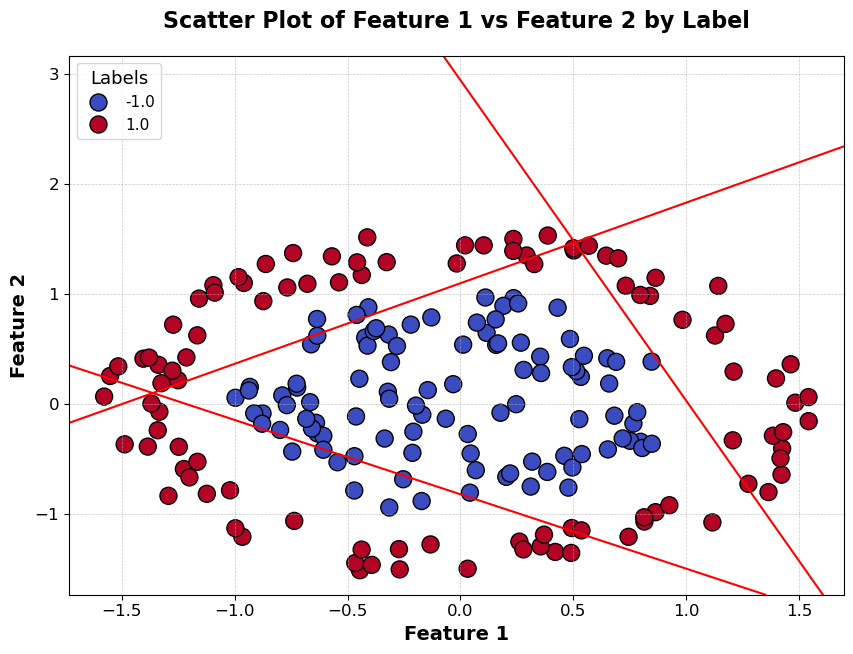

In [59]:
plt.figure(figsize=(10, 7))
scatter_plot = sns.scatterplot(data=df, x='feature 1', y='feature 2', hue='label', 
                               palette='coolwarm', s=150, edgecolor="black", marker='o')

for i in range(slopes.shape[0]):
    plt.axline((0, float(offsets[i])), slope=slopes[i], color='r')
plt.title("Scatter Plot of Feature 1 vs Feature 2 by Label", fontsize=16, weight='bold', pad=20)
plt.xlabel("Feature 1", fontsize=14, weight='bold')
plt.ylabel("Feature 2", fontsize=14, weight='bold')
plt.legend(title='Labels', title_fontsize='13', fontsize='11', loc='upper left', frameon=True)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [60]:
preds = model.test(X_test=X_test)
print(f'Accuracy score for 3 neurons: {accuracy_score(y_test, preds)}')

Accuracy score for 3 neurons: 0.86


In [61]:
model = Madline(n_neurons=4)

Shape of weights between input and hidden layer is: (2, 4)
Shape of bias for first layer: (4,)
Shape of weights between hidden and output layer is: (4,)
Shape of bias for output layer: (1,)


In [62]:
model.train(lr=1e-1, epochs=15000, X=X_train, labels=y_train)

  0%|          | 0/15000 [00:00<?, ?it/s]

Number of epochs: 17


In [63]:
slopes, offsets = model.get_lines()

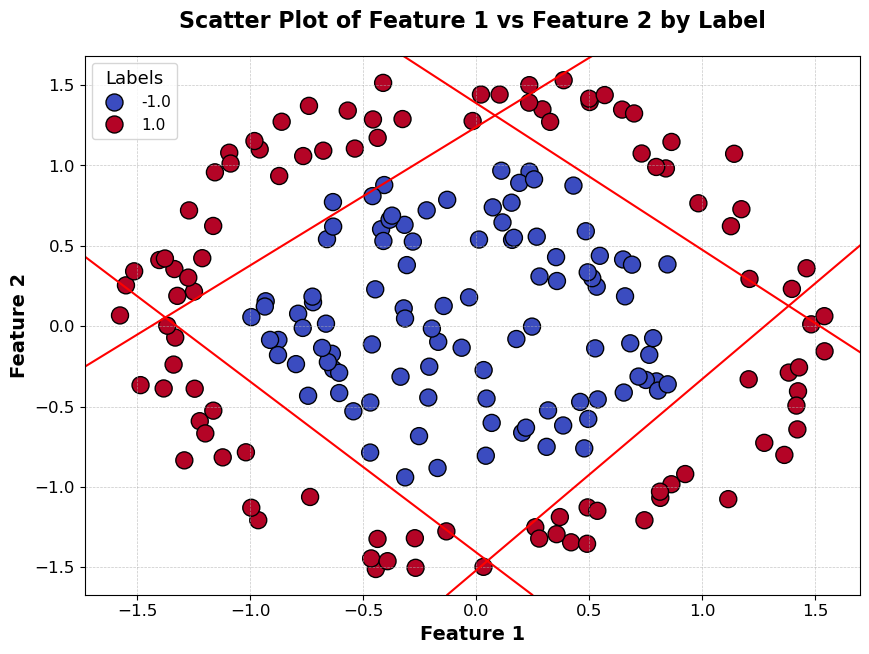

In [64]:
plt.figure(figsize=(10, 7))
scatter_plot = sns.scatterplot(data=df, x='feature 1', y='feature 2', hue='label', 
                               palette='coolwarm', s=150, edgecolor="black", marker='o')

for i in range(slopes.shape[0]):
    plt.axline((0, float(offsets[i])), slope=slopes[i], color='r')
plt.title("Scatter Plot of Feature 1 vs Feature 2 by Label", fontsize=16, weight='bold', pad=20)
plt.xlabel("Feature 1", fontsize=14, weight='bold')
plt.ylabel("Feature 2", fontsize=14, weight='bold')
plt.legend(title='Labels', title_fontsize='13', fontsize='11', loc='upper left', frameon=True)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [65]:
preds = model.test(X_test=X_test)
print(f'Accuracy score for 4 neurons: {accuracy_score(y_test, preds)}')

Accuracy score for 4 neurons: 0.98


In [66]:
model = Madline(n_neurons=8)

Shape of weights between input and hidden layer is: (2, 8)
Shape of bias for first layer: (8,)
Shape of weights between hidden and output layer is: (8,)
Shape of bias for output layer: (1,)


In [67]:
model.train(lr=1e-1, epochs=20000, X=X_train, labels=y_train)

  0%|          | 0/20000 [00:00<?, ?it/s]

Number of epochs: 22


In [68]:
slopes, offsets = model.get_lines()

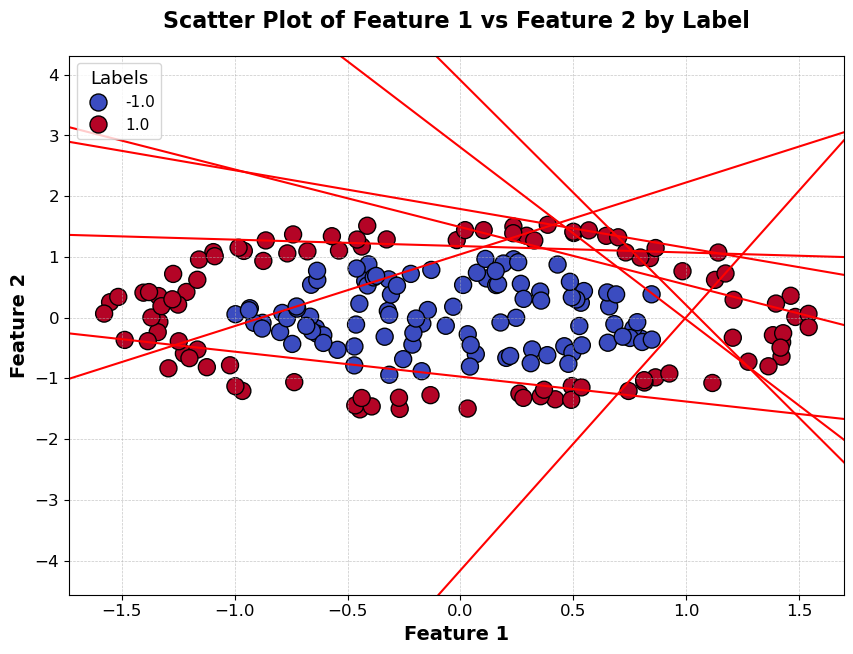

In [69]:
plt.figure(figsize=(10, 7))
scatter_plot = sns.scatterplot(data=df, x='feature 1', y='feature 2', hue='label', 
                               palette='coolwarm', s=150, edgecolor="black", marker='o')

for i in range(slopes.shape[0]):
    plt.axline((0, float(offsets[i])), slope=slopes[i], color='r')
plt.title("Scatter Plot of Feature 1 vs Feature 2 by Label", fontsize=16, weight='bold', pad=20)
plt.xlabel("Feature 1", fontsize=14, weight='bold')
plt.ylabel("Feature 2", fontsize=14, weight='bold')
plt.legend(title='Labels', title_fontsize='13', fontsize='11', loc='upper left', frameon=True)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [70]:
preds = model.test(X_test=X_test)
print(f'Accuracy score for 8 neurons: {accuracy_score(y_test, preds)}')

Accuracy score for 8 neurons: 0.92
